# Self-Driving Car Engineer Nanodegree

## Behavioral Cloning


---
## Step 0: Load The Data

In [1]:
# the code copied from David

import csv
import numpy as np
import cv2
import matplotlib.pyplot as plt

lines = []
with open('C:/Users/Administrator/Jupyter Notebook P4 test/Track1 20181006/driving_log.csv') as csvfile:
    reader = csv.reader(csvfile)
    for line in reader:
        lines.append(line)

        
images = []
measurements = []
for line in lines:
    # using 3 cameras
    for i in range(3):
        source_path = line[i]
        filename = source_path.split("\\")[-1]
        current_path = 'C:/Users/Administrator/Jupyter Notebook P4 test/Track1 20181006/IMG/' + filename
        image = cv2.imread(current_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # added 
        images.append(image)
    
    measurement = float(line[3]) # change the format of the 4th line, steering angle
    
    correction = 0.2
    measurements.append(measurement)
    measurements.append(measurement+correction)
    measurements.append(measurement-correction)
    
    
# flip images
augmented_images = []
augmented_measurements = []
for image, measurement in zip(images, measurements):
    augmented_images.append(image)
    augmented_measurements.append(measurement)
    flipped_image = cv2.flip(image,1)
    flipped_measurement = measurement * -1.0
    augmented_images.append(flipped_image)
    augmented_measurements.append(flipped_measurement)

# X_train = np.array(images)
# y_train = np.array(measurements)

X_train = np.array(augmented_images)
y_train = np.array(augmented_measurements)
    
print('It runs OK!')

It runs OK!


In [2]:
print(len(lines)*3)
print(len(measurements))
print(len(images))

22164
22164
22164



line: ['E:\\妗岄潰\\Track1 20181006\\IMG\\center_2018_10_06_18_16_40_362.jpg', 'E:\\妗岄潰\\Track1 20181006\\IMG\\left_2018_10_06_18_16_40_362.jpg', 'E:\\妗岄潰\\Track1 20181006\\IMG\\right_2018_10_06_18_16_40_362.jpg', '-0.2169811', '1', '0', '28.24878']

source_path: E:\妗岄潰\Track1 20181006\IMG\right_2018_10_06_18_16_40_362.jpg

filename: right_2018_10_06_18_16_40_362.jpg

current_path: C:/Users/Administrator/Jupyter Notebook P4 test/Track1 20181006/IMG/right_2018_10_06_18_16_40_362.jpg

image.shape: (160, 320, 3)

measurement: -0.4169811

X_train:  (44328, 160, 320, 3)  y_train:  (44328,)
type(image): <class 'numpy.ndarray'>
9368


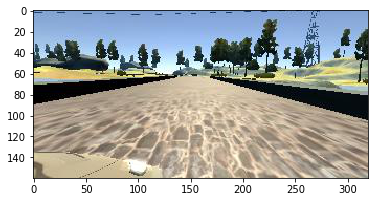

In [5]:
print('\nline:',line)
print("\nsource_path:",source_path)
print("\nfilename:",filename)
print("\ncurrent_path:",current_path)
print("\nimage.shape:",image.shape)
print("\nmeasurement:",measurement)


print("\nX_train: ", X_train.shape,  " y_train: ", y_train.shape)
print('type(image):',type(image))

rand_num = np.random.randint(len(images))
print(rand_num)

test_show = images[rand_num]
plt.imshow(test_show)


In [4]:
# codes of David's
from keras.models import Sequential
from keras.layers import Flatten,Dense,Lambda,Dropout
from keras.layers.convolutional import Convolution2D, Cropping2D
from keras.layers.pooling import MaxPooling2D

model = Sequential()
model.add(Lambda(lambda x: x/255.0 - 0.5, input_shape=(160,320,3)))

# crop images
model.add(Cropping2D(cropping=((70,25),(0,0))))

# nvidia end-to-end
model.add(Convolution2D(24,5,5, subsample=(2,2), activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(36,5,5, subsample=(2,2), activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(48,5,5, subsample=(2,2), activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(64,3,3, activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(64,3,3, activation='relu'))

model.add(Flatten())
model.add(Dense(100))
model.add(Dropout(0.5))
model.add(Dense(50))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')
model.fit(X_train, y_train, validation_split=0.2,shuffle=True, nb_epoch=5)

model.save('model.h5')

print('model saved.')

D:\Program Files\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
D:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(24, (5, 5), activation="relu", strides=(2, 2))`
  
D:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(36, (5, 5), activation="relu", strides=(2, 2))`
  app.launch_new_instance()
D:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (5, 5), activation="relu", strides=(2, 2))`
D:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: User

Train on 35462 samples, validate on 8866 samples
Epoch 1/5
35462/35462 [==============================] - 651s 18ms/step - loss: 0.0238 - val_loss: 0.0242
Epoch 2/5
35462/35462 [==============================] - 639s 18ms/step - loss: 0.0204 - val_loss: 0.0257
Epoch 3/5
35462/35462 [==============================] - 645s 18ms/step - loss: 0.0201 - val_loss: 0.0296
Epoch 4/5
35462/35462 [==============================] - 633s 18ms/step - loss: 0.0196 - val_loss: 0.0230
Epoch 5/5
35462/35462 [==============================] - 614s 17ms/step - loss: 0.0190 - val_loss: 0.0205
model saved.
